In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Loading and Exploration

In [2]:
# Loading Dataset
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


This is a classification problem. There is presence of both categorical anf numerical data and there are 32560 rows and 15 columns.

In [3]:
#Checking for missing values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no missing values in our dataset.

In [4]:
# Checking datatypes
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

There is presence of both categorical and numerical data.

In [5]:
# Checking number of unique values
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [6]:
# Checking the counts of label categories
income = df['Income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

 <=50K    75.92 %
 >50K     24.08 %
Name: Income, dtype: object

The target variable is imbalanced.

## Data Visualiztion 

### Univariate Analysis 

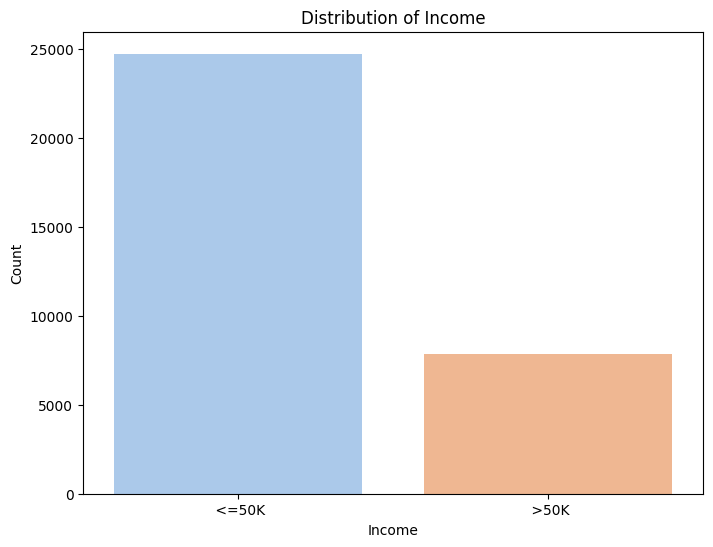

In [7]:
# Setting a colorful style using Seaborn
sns.set_palette("pastel")

# Plotting bar plot for Income
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Income', palette='pastel')
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Distribution of Income')
plt.show()

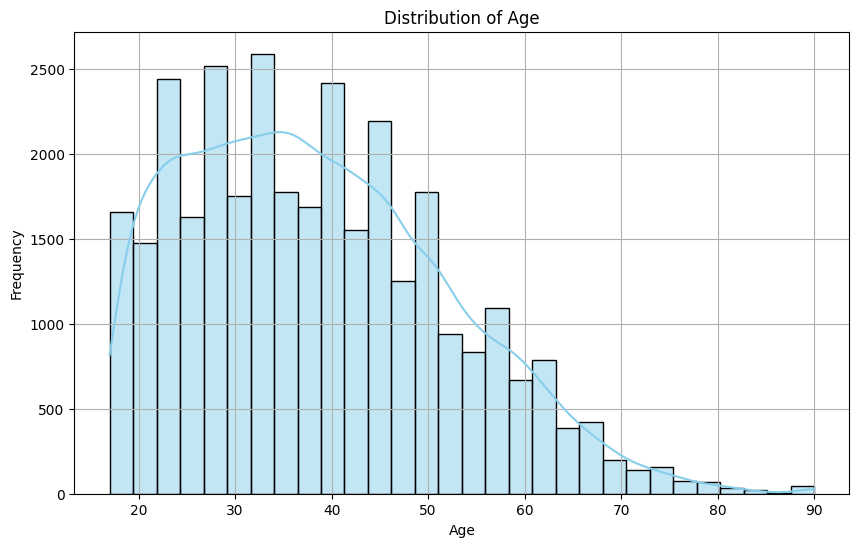

In [8]:
# Setting a colorful style using Seaborn
sns.set_palette("bright")

# Plotting distribution plot for Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=30, kde=True, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.grid(True)
plt.show()

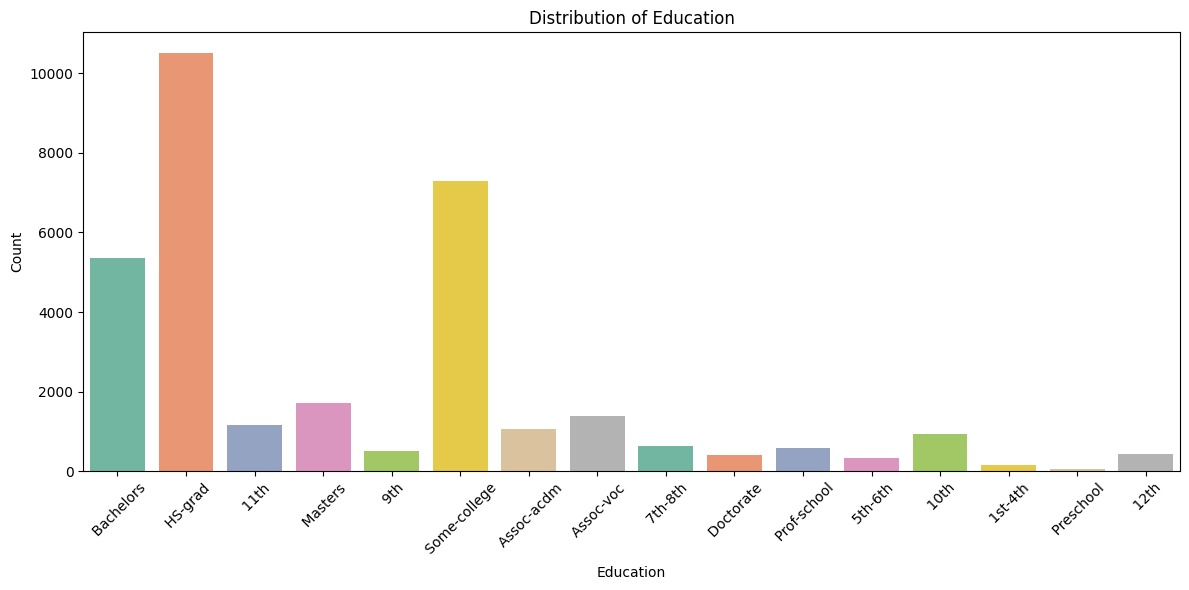

In [9]:
# Setting a colorful style using Seaborn
sns.set_palette("Set2")

# Plotting bar plot for Education
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Education', palette='Set2')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Education')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

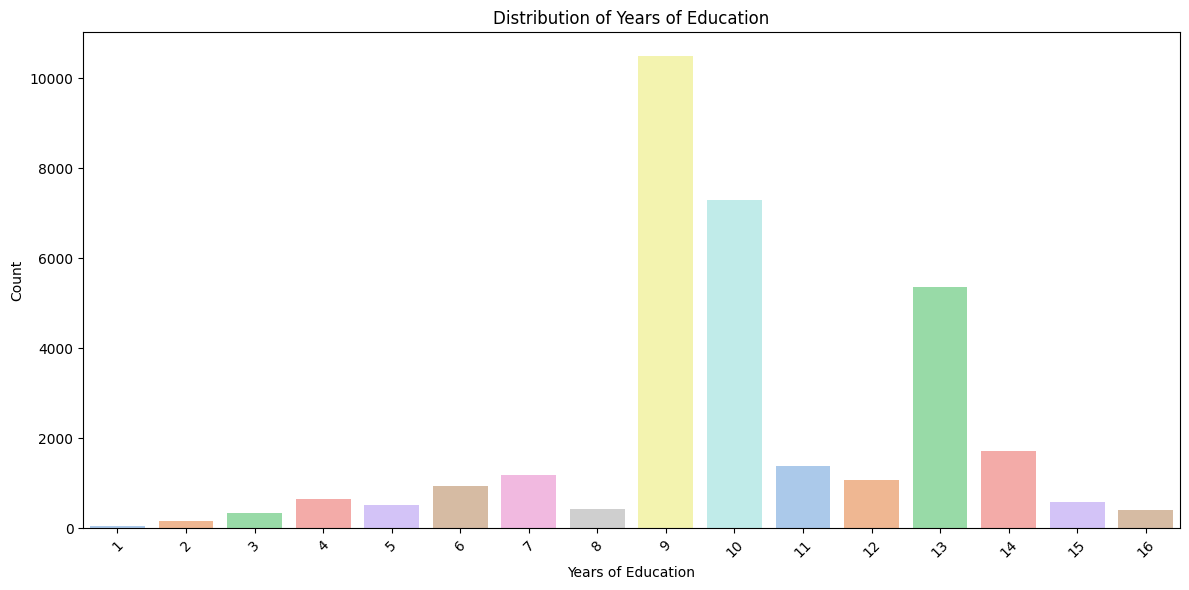

In [10]:
# Setting a colorful style using Seaborn
sns.set_palette("pastel")

# Plotting bar plot for Education_num (Years of Education)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Education_num', palette='pastel')
plt.xlabel('Years of Education')
plt.ylabel('Count')
plt.title('Distribution of Years of Education')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

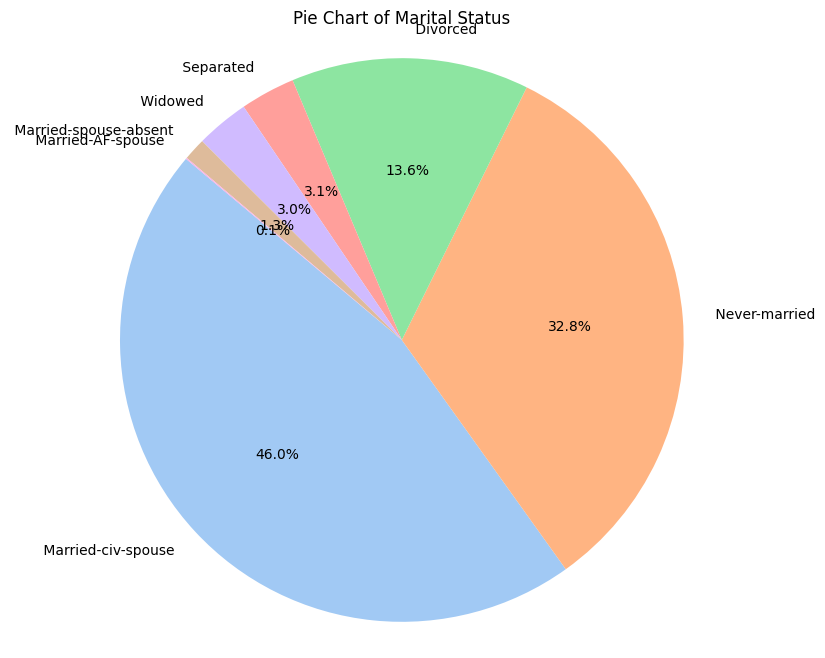

In [11]:
# Calculating value counts for Marital_status
marital_counts = df['Marital_status'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Marital Status')
plt.axis('equal')  
plt.show()

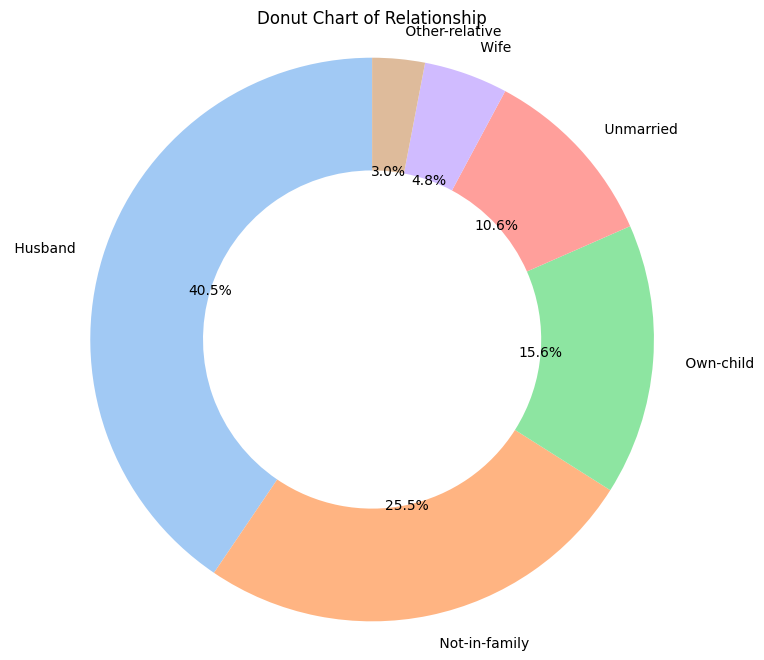

In [12]:
# Calculating value counts for Relationship
relationship_counts = df['Relationship'].value_counts()

# Plotting a donut chart
plt.figure(figsize=(8, 8))
plt.pie(relationship_counts, labels=relationship_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
plt.title('Donut Chart of Relationship')
plt.axis('equal')  
plt.show()

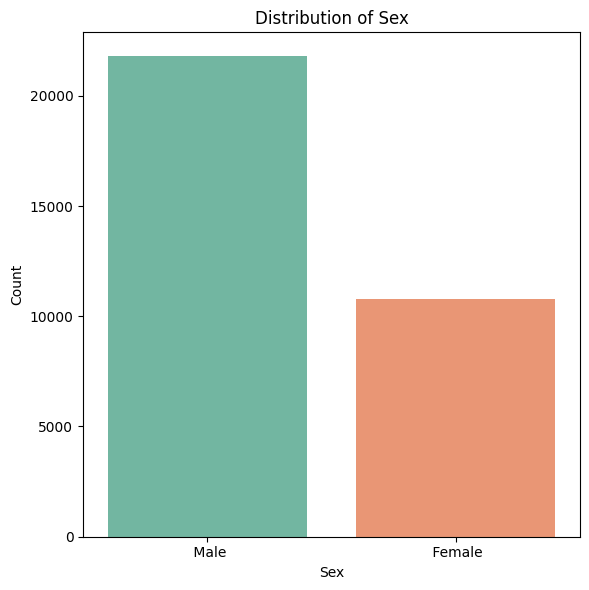

In [13]:
# Setting a colorful style using Seaborn
sns.set_palette("Set2")

# Plotting bar plot for Sex
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Sex', palette='Set2')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

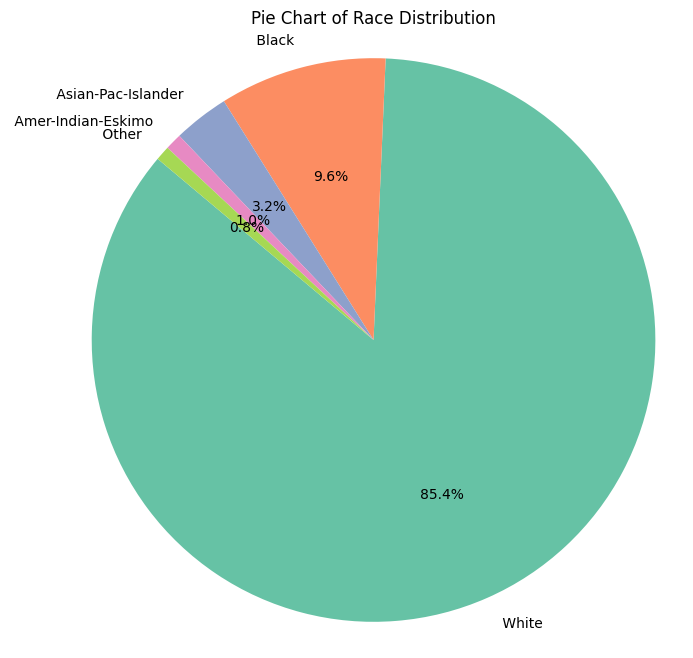

In [14]:
# Calculating value counts for Race
race_counts = df['Race'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Race Distribution')
plt.axis('equal')  
plt.show()

### Bivariate Analysis

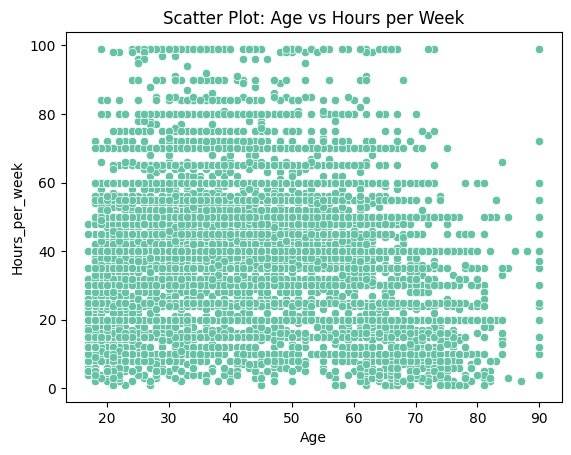

In [15]:
# Scatter Plot
sns.scatterplot(data=df, x='Age', y='Hours_per_week')
plt.title('Scatter Plot: Age vs Hours per Week')
plt.show()

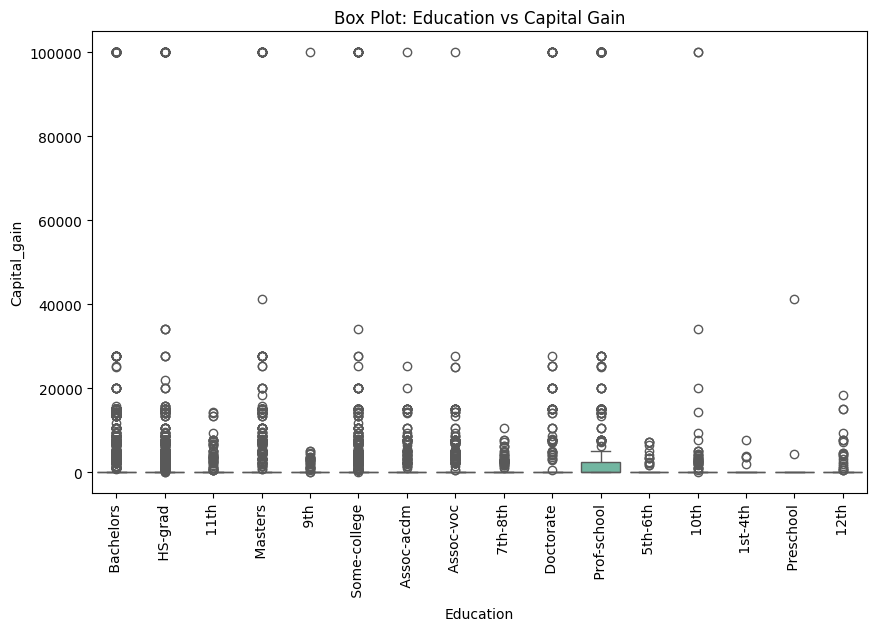

In [16]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Education', y='Capital_gain')
plt.title('Box Plot: Education vs Capital Gain')
plt.xticks(rotation=90)
plt.show()

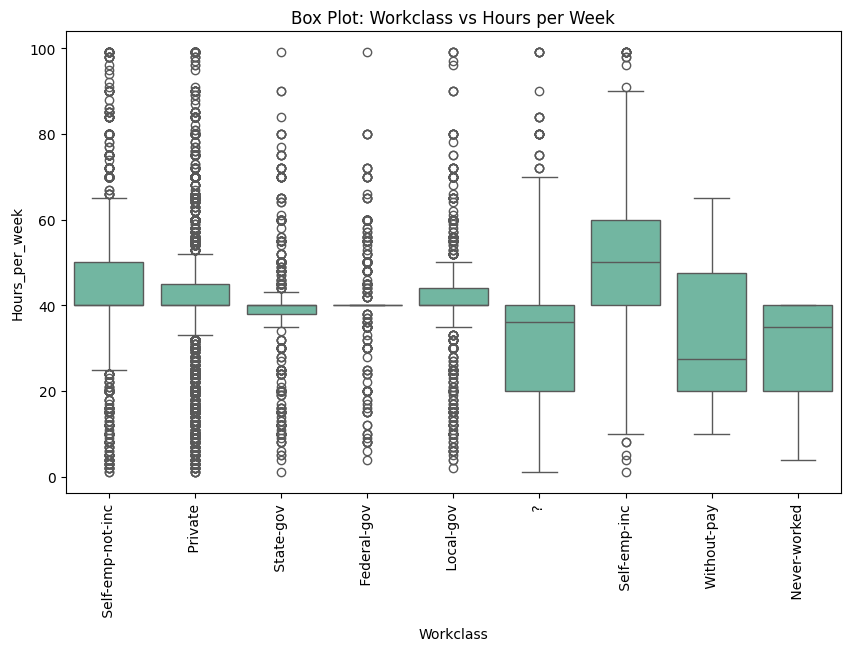

In [17]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Workclass', y='Hours_per_week')
plt.title('Box Plot: Workclass vs Hours per Week')
plt.xticks(rotation=90)
plt.show()

Crosstab:
 Income                   <=50K   >50K
Marital_status                       
 Divorced                 3980    463
 Married-AF-spouse          13     10
 Married-civ-spouse       8284   6692
 Married-spouse-absent     384     34
 Never-married           10191    491
 Separated                 959     66
 Widowed                   908     85


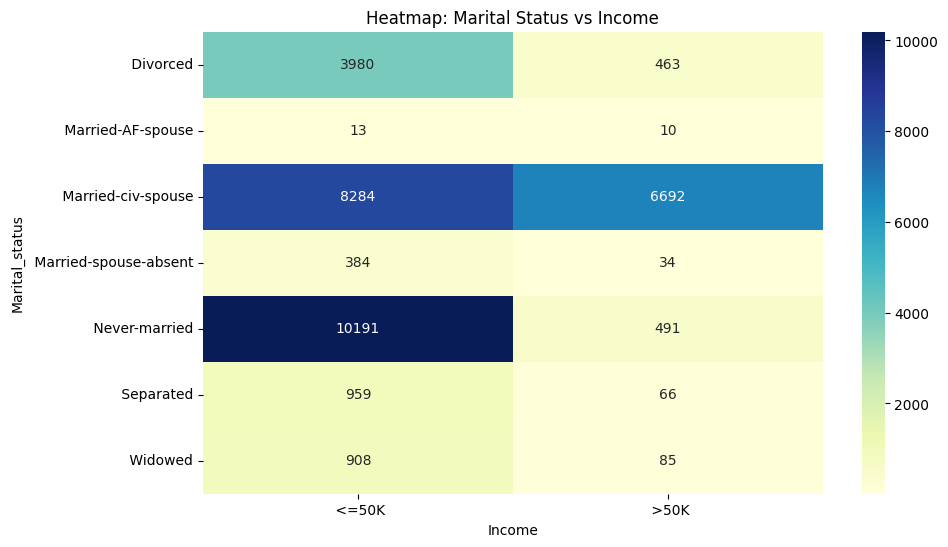

In [19]:
# Crosstab
crosstab = pd.crosstab(df['Marital_status'], df['Income'])
print("Crosstab:\n", crosstab)

plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap: Marital Status vs Income')
plt.show()

Crosstab:
 Sex                   Female   Male
Race                               
 Amer-Indian-Eskimo      119    192
 Asian-Pac-Islander      346    693
 Black                  1555   1569
 Other                   109    162
 White                  8642  19173


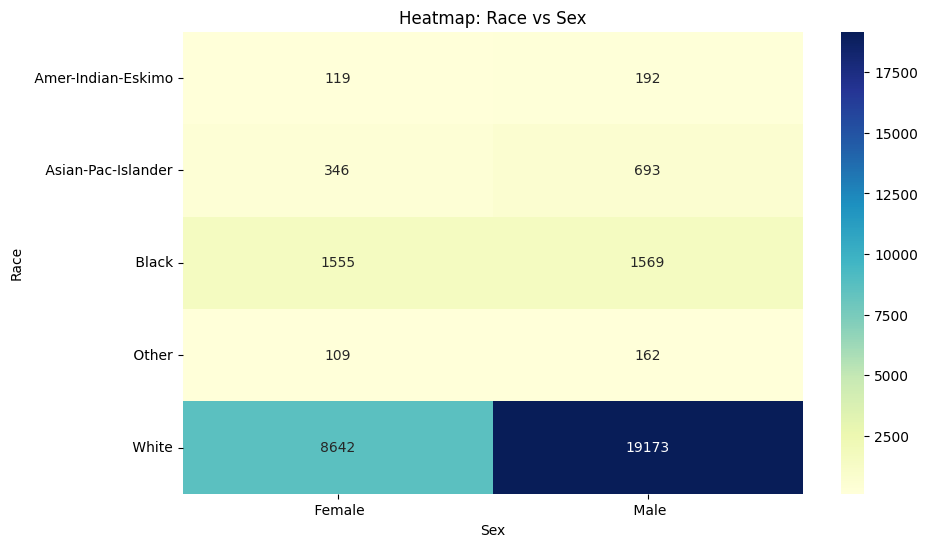

In [20]:
# Crosstab
crosstab = pd.crosstab(df['Race'], df['Sex'])
print("Crosstab:\n", crosstab)

plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap: Race vs Sex')
plt.show()

Crosstab:
 Income               <=50K   >50K
Occupation                       
 ?                    1652    191
 Adm-clerical         3262    507
 Armed-Forces            8      1
 Craft-repair         3170    929
 Exec-managerial      2098   1968
 Farming-fishing       879    115
 Handlers-cleaners    1284     86
 Machine-op-inspct    1752    250
 Other-service        3158    137
 Priv-house-serv       148      1
 Prof-specialty       2281   1859
 Protective-serv       438    211
 Sales                2667    983
 Tech-support          645    283
 Transport-moving     1277    320


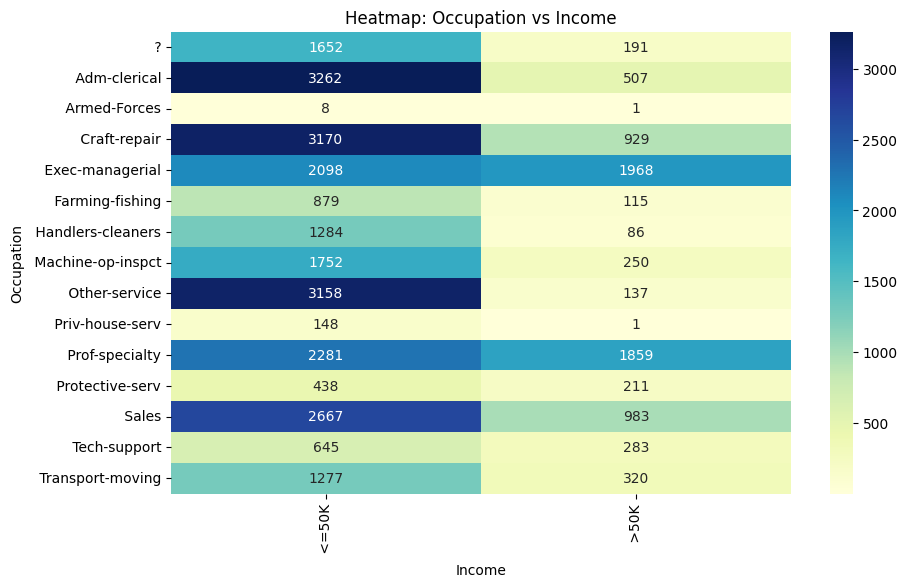

In [21]:
# Crosstab
crosstab = pd.crosstab(df['Occupation'], df['Income'])
print("Crosstab:\n", crosstab)

plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap: Occupation vs Income')
plt.xticks(rotation=90)
plt.show()

### Multivariate Analysis

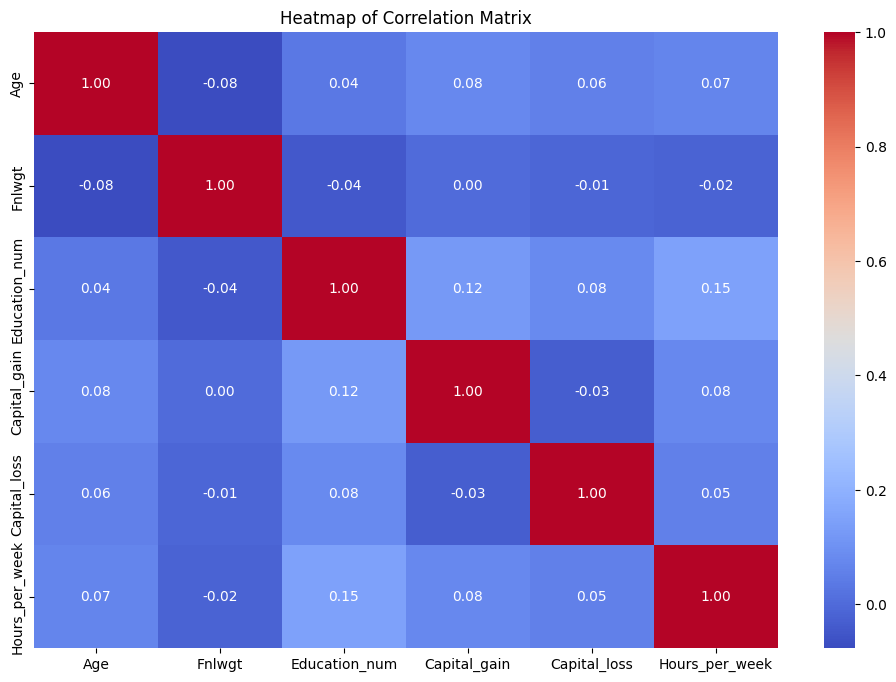

In [22]:
# Computing the correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()

### Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_columns = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']

# Applying Label Encoding to each categorical column
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Displaying the transformed DataFrame
print(df.head())


   Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0   50          6   83311          9             13               2   
1   38          4  215646         11              9               0   
2   53          4  234721          1              7               2   
3   28          4  338409          9             13               2   
4   37          4  284582         12             14               2   

   Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0           4             0     4    1             0             0   
1           6             1     4    1             0             0   
2           6             0     2    1             0             0   
3          10             5     2    0             0             0   
4           4             5     4    0             0             0   

   Hours_per_week  Native_country  Income  
0              13              39       0  
1              40              39       0  
2              40   

In [24]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [25]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


### Outliers

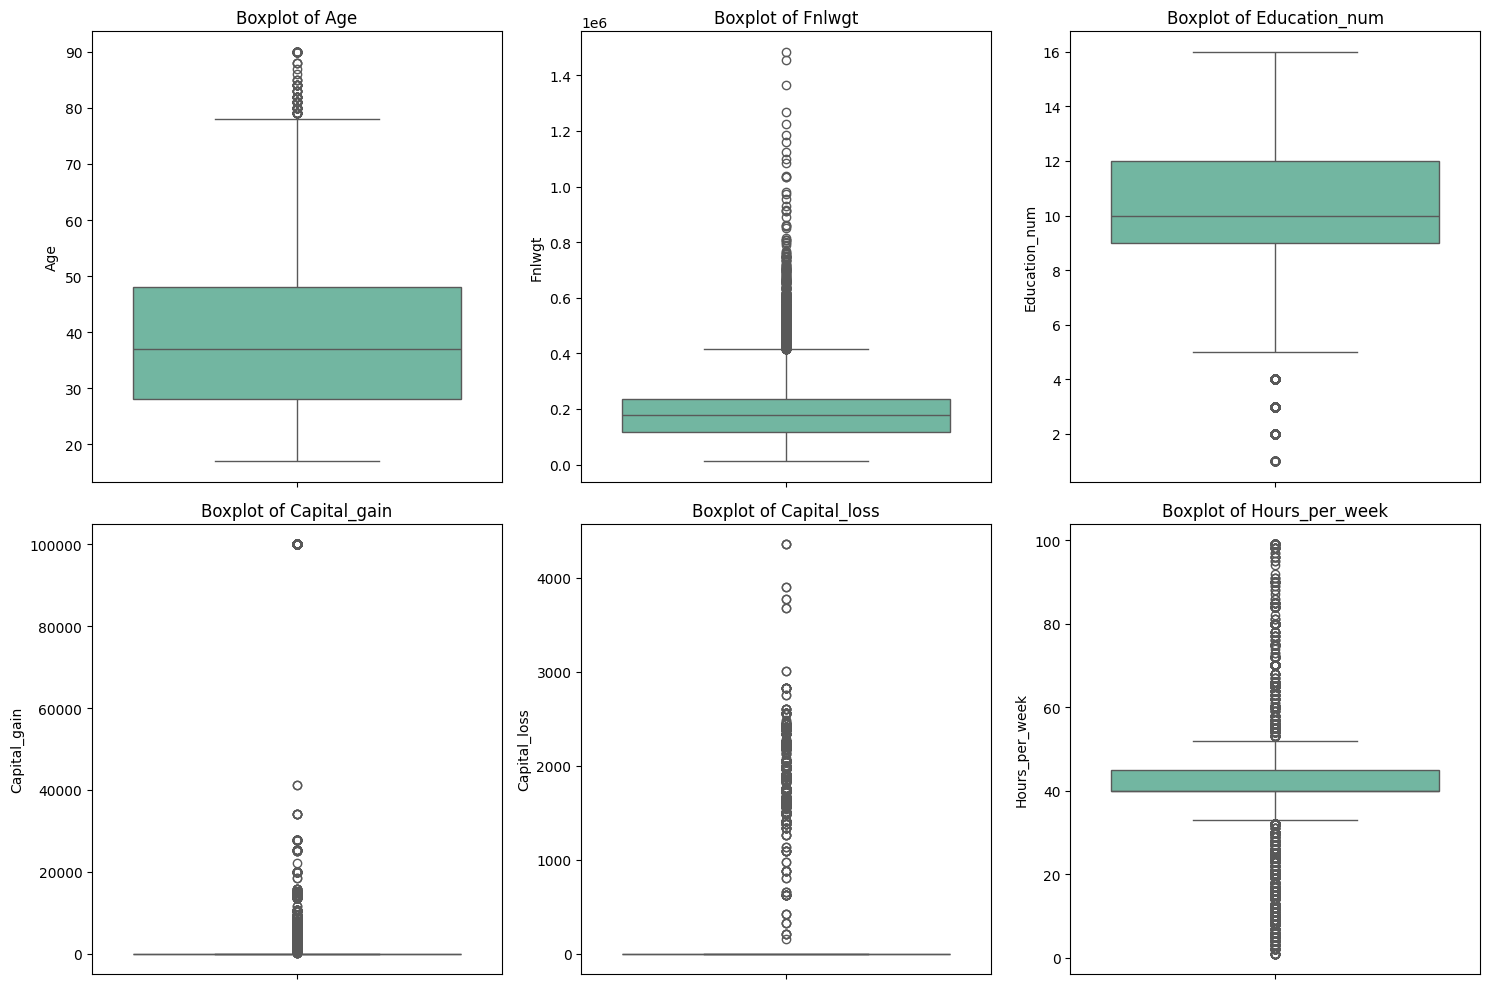

In [26]:
# List of numerical columns to checking for outliers
numerical_columns = ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flattening the axes array for easy iteration
axes = axes.flatten()

# Creating a boxplot for each numerical column
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Adjusting layout
plt.tight_layout()
plt.show()

There is presence of outliers in all the columns availbale above.

In [27]:
from scipy import stats

# Function to remove outliers using Z-score
def remove_outliers_zscore(df, columns):
    for col in columns:
        z_scores = stats.zscore(df[col])
        abs_z_scores = abs(z_scores)
        df = df[(abs_z_scores < 3)]
    return df

# Removing outliers from numerical columns using Z-score method
df = remove_outliers_zscore(df, numerical_columns)

# Checking the shape of the cleaned DataFrame
print("Shape of cleaned DataFrame (Z-score method):", df)


Shape of cleaned DataFrame (Z-score method):        Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0       50          6   83311          9             13               2   
1       38          4  215646         11              9               0   
2       53          4  234721          1              7               2   
3       28          4  338409          9             13               2   
4       37          4  284582         12             14               2   
...    ...        ...     ...        ...            ...             ...   
32555   27          4  257302          7             12               2   
32556   40          4  154374         11              9               2   
32557   58          4  151910         11              9               6   
32558   22          4  201490         11              9               4   
32559   52          5  287927         11              9               2   

       Occupation  Relationship  Race  Sex  Capital_ga

In [28]:
df.sample(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
8902,40,5,190290,9,13,2,12,0,4,1,0,0,40,0,1
3009,44,5,168845,11,9,2,12,5,4,0,0,0,60,39,0
21177,32,7,481096,4,3,4,7,3,4,0,0,0,10,39,0
2084,37,4,49115,12,14,2,4,0,4,1,0,0,60,39,1
16110,24,1,287988,9,13,4,2,1,4,1,0,0,40,39,0


### Handling Class Imbalance with SMOTE

In [29]:
from imblearn.over_sampling import SMOTE

# Separating features (X) and target variable (y)
X = df.drop('Income', axis=1)
y = df['Income']

# Applying SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Converting X_resampled back to DataFrame for convenience
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)

# Displaying the shape of resampled data
print("Shape of X_resampled:", X_resampled.shape)
print("Value counts of y_resampled:\n", y_resampled.value_counts())


Shape of X_resampled: (46348, 14)
Value counts of y_resampled:
 0    23174
1    23174
Name: Income, dtype: int64


### Training the Logistic Regression Model

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initializing Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Training the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.59

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.96      0.70      4650
           1       0.83      0.21      0.33      4620

    accuracy                           0.59      9270
   macro avg       0.69      0.58      0.52      9270
weighted avg       0.69      0.59      0.52      9270


Confusion Matrix:
[[4459  191]
 [3656  964]]


### Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Initializing Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Training the model
rf_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluating the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier")
print(f"Accuracy: {accuracy_rf:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier
Accuracy: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      4650
           1       0.89      0.90      0.89      4620

    accuracy                           0.89      9270
   macro avg       0.89      0.89      0.89      9270
weighted avg       0.89      0.89      0.89      9270


Confusion Matrix:
[[4141  509]
 [ 480 4140]]


### Gradient Boosting Classifier

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

# Initializing Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Training the model
gb_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Evaluating the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("\nGradient Boosting Classifier")
print(f"Accuracy: {accuracy_gb:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))


Gradient Boosting Classifier
Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4650
           1       0.87      0.89      0.88      4620

    accuracy                           0.88      9270
   macro avg       0.88      0.88      0.88      9270
weighted avg       0.88      0.88      0.88      9270


Confusion Matrix:
[[4033  617]
 [ 517 4103]]


### Support Vector Machine 

In [33]:
from sklearn.svm import SVC

# Initializing SVM Classifier
svm_classifier = SVC(random_state=42)

# Training the model
svm_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluating the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("\nSupport Vector Machine (SVM) Classifier")
print(f"Accuracy: {accuracy_svm:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


Support Vector Machine (SVM) Classifier
Accuracy: 0.59

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.99      0.71      4650
           1       0.94      0.19      0.32      4620

    accuracy                           0.59      9270
   macro avg       0.75      0.59      0.51      9270
weighted avg       0.74      0.59      0.51      9270


Confusion Matrix:
[[4593   57]
 [3740  880]]


### K-Nearest Neighbors

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN Classifier
knn_classifier = KNeighborsClassifier()

# Train the model
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("\nK-Nearest Neighbors (KNN) Classifier")
print(f"Accuracy: {accuracy_knn:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors (KNN) Classifier
Accuracy: 0.72

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.67      0.70      4650
           1       0.70      0.77      0.73      4620

    accuracy                           0.72      9270
   macro avg       0.72      0.72      0.72      9270
weighted avg       0.72      0.72      0.72      9270


Confusion Matrix:
[[3096 1554]
 [1064 3556]]


#### Among all the models Random forest is giving highest accuracy followed by gradient boosting.

### Saving Model

In [36]:
import joblib
filename = 'random_forest_model.pkl'
joblib.dump(rf_classifier, filename)

print(f"Random Forest model saved as {filename}")

Random Forest model saved as random_forest_model.pkl


### Documentation

After importing necessary libraries and dataset I started exporing the dataset checking for missing values, datatypes,number of unique values etc. Then I did univariate analysis, Bivariate Analysis and Multivariate Analysis followed by transforming categorical variables inot numerical then i checked for outliers and removed them using Zscore method. then i balanced the imbalanced class and By creating different models and evaluating i saved the random forest model due to its best performance.